In [2]:
pip install pyNetLogo

  Using cached pyNetLogo-0.4.2.tar.gz (58 kB)
  Created wheel for pyNetLogo: filename=pyNetLogo-0.4.2-py3-none-any.whl size=64604 sha256=183a8b320155885b9736f418ce354d24090efe78d415f46787d80f057e8fe022
  Stored in directory: c:\users\archipel-03\appdata\local\pip\cache\wheels\fa\5c\68\702aa26a9d2fbd249fe9c4c9d4d333e2baada598c3628e11fb
Successfully built pyNetLogo
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install jpype1

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from ema_workbench import (Model, RealParameter, TimeSeriesOutcome, Constant, CategoricalParameter, IntegerParameter, perform_experiments, ema_logging)

from ema_workbench.connectors.netlogo import NetLogoModel
from ema_workbench.connectors.excel import ExcelModel

from ema_workbench.em_framework.evaluators import LHS, SOBOL, MORRIS

from ema_workbench.analysis import plotting

#### All input parameters and input possibilities

* EMA/pyNetLogo passes the string value as a raw text into NetLogo, as opposed to as a string. Single '' around the string solve the issue

|Parameter	|Range or value	| Parameter class |
|-----------|--------------|-----------------:|
|Final time	    |1565	    | run_length|
|GDP    	|1 – 10	| IntegerParameter|
|rainfall   |1 – 10 	| IntegerParameter|
|water_demand     	|1 – 10	    |IntegerParameter |
|regulations	    |1 – 10	    | IntegerParameter|
|trust_agriculture	    |1 – 10	    | IntegerParameter|
|trust_government    |1 – 10	    | IntegerParameter|
|knowledge_dev	    |1 – 10	    | IntegerParameter|
|GDP_change    |'"decreasing"', '"constant"', '"increasing"'	    | CategoricalParameter|
|w_demand_change	    |'"decreasing"', '"constant"', '"increasing"'	    |CategoricalParameter |
|regulations_change	    |'"decreasing"', '"constant"', '"increasing"'	    |CategoricalParameter |
|trust_agri_change	    |'"decreasing"', '"constant"', '"increasing"'    |CategoricalParameter |
|trust_gov_change	    |'"decreasing"', '"constant"', '"increasing"'	    |CategoricalParameter |
|know_dev_change	    |'"decreasing"', '"constant"', '"increasing"'	    |CategoricalParameter |
|GDP_change_r	    |'"gradual"', '"medium"', '"abrupt"'	    |CategoricalParameter |
|rainfall_change_r	    |'"gradual"', '"medium"', '"abrupt"'	    |CategoricalParameter |
|w_demand_change_r	    |'"gradual"', '"medium"', '"abrupt"'	    |CategoricalParameter |
|regulations_change_r	    |'"gradual"', '"medium"', '"abrupt"'	    |CategoricalParameter |
|trust_agri_change_r	    |'"gradual"', '"medium"', '"abrupt"'	    |CategoricalParameter |
|trust_gov_change_r	    |'"gradual"', '"medium"', '"abrupt"'	    |CategoricalParameter |
|know_dev_change_r	    |'"gradual"', '"medium"', '"abrupt"'	    |CategoricalParameter |
|No_consumers	    |4 - 100	    |IntegerParameter |
|No_farmers    |4 - 20	    |IntegerParameter |
|Leader_network_size	    |6 - 12	    |IntegerParameter |
|consumer_leaders    |0 - 0.25	    |RealParameter |
|farmer_leaders	    |0 - 0.25	    |RealParameter |
|leader_influence    |1 - 10	    |IntegerParameter |

#### Outcome parameters
|Outcomes	|Outcome class	
|-----------|--------------:|
|TIME	    |TimeSeriesOutcome	    |
|average_risk_consumers	    |TimeSeriesOutcome	    |
|average_benefit_consumers	    |TimeSeriesOutcome	    |
|average_risk_farmers	    |TimeSeriesOutcome	    |
|average_benefit_farmers	    |TimeSeriesOutcome	    |
|optimistic_consumers	    |TimeSeriesOutcome	    |
|conflicted_consumers	    |TimeSeriesOutcome	    |
|neutral_consumers	    |TimeSeriesOutcome	    |
|alarmed_consumers	    |TimeSeriesOutcome	    |
|optimistic_farmers	    |TimeSeriesOutcome	    |
|conflicted_farmers	    |TimeSeriesOutcome	    |
|neutral_farmers	    |TimeSeriesOutcome	    |
|alarmed_farmers	    |TimeSeriesOutcome	    |

In [3]:
ema_logging.log_to_stderr(ema_logging.INFO)

#We can define common uncertainties and outcomes for each model:
uncertainties = [IntegerParameter('GDP', 3, 7),
                 IntegerParameter('rainfall', 3, 7),
                 IntegerParameter('water_demand', 8, 10),
                 IntegerParameter('regulations', 5, 8),
                ] 

outcomes = [TimeSeriesOutcome('TIME'),
            TimeSeriesOutcome('average_risk_consumers'),
            TimeSeriesOutcome('average_benefit_consumers'), 
            TimeSeriesOutcome('average_risk_farmers'),
            TimeSeriesOutcome('average_benefit_farmers'),]

constants = [Constant('GDP_change', '"constant"'),
             Constant('rainfall_change', '"constant"'),
             Constant('w_demand_change', '"constant"'),
             Constant('regulations_change', '"constant"'),
             Constant('trust_agri_change', '"constant"'),
             Constant('trust_gov_change', '"constant"'),
             Constant('know_dev_change', '"constant"'),  
             Constant('trust_agriculture', 5),
             Constant('trust_government', 5),
             Constant('knowledge_dev', 5),
             Constant('No_consumers', 100),
             Constant('No_farmers', 20),
             Constant('consumer_leaders', 0.10),
             Constant('farmer_leaders', 0.10),
             Constant('leader_influence', 7)]
             
           
        

#Define the NetLogo model
nl_model = NetLogoModel('NetLogo', wd='./', model_file="Risk_benefit_model_fullSetUp.nlogo")
nl_model.run_length = 1565
nl_model.replications = 1
nl_model.uncertainties = uncertainties
nl_model.outcomes = outcomes
nl_model.constants = constants

In [4]:
nr_experiments = 10

#Using Latin Hypercube sampling
experiments, outcomes = perform_experiments(nl_model, nr_experiments, 
                                            uncertainty_sampling=LHS)

[MainProcess/INFO] performing 10 scenarios * 1 policies * 1 model(s) = 10 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 1 cases completed
[MainProcess/INFO] 2 cases completed
[MainProcess/INFO] 3 cases completed
[MainProcess/INFO] 4 cases completed
[MainProcess/INFO] 5 cases completed
[MainProcess/INFO] 6 cases completed
[MainProcess/INFO] 7 cases completed
[MainProcess/INFO] 8 cases completed
[MainProcess/INFO] 9 cases completed
[MainProcess/INFO] 10 cases completed
[MainProcess/INFO] experiments finished


In [5]:
print(experiments.shape)
print(outcomes['average_benefit_farmers'].shape)

#The experiments are grouped sequentially by model
experiments

(10, 7)
(10, 1, 1566)


,GDP,rainfall,regulations,water_demand,scenario,policy,model
0,6.0,3.0,7.0,10.0,0,None,NetLogo
1,5.0,6.0,6.0,8.0,1,None,NetLogo
2,4.0,7.0,5.0,9.0,2,None,NetLogo
3,6.0,4.0,6.0,8.0,3,None,NetLogo
4,3.0,5.0,8.0,9.0,4,None,NetLogo
5,7.0,7.0,5.0,9.0,5,None,NetLogo
6,7.0,4.0,7.0,10.0,6,None,NetLogo
7,3.0,6.0,8.0,8.0,7,None,NetLogo
8,4.0,3.0,6.0,9.0,8,None,NetLogo
9,5.0,5.0,8.0,10.0,9,None,NetLogo


In [6]:
for k, v in outcomes.items():
    print(k, v.shape)

TIME (10, 1, 1566)
average_risk_consumers (10, 1, 1566)
average_benefit_consumers (10, 1, 1566)
average_risk_farmers (10, 1, 1566)
average_benefit_farmers (10, 1, 1566)


In [7]:
outcomes["average_risk_consumers"]

array([[[38.01281991, 38.80046728, 39.54934666, ..., 57.03681329,
         57.29579144, 57.46119166]],

       [[38.20565297, 38.21139516, 38.25546957, ..., 46.20069001,
         46.13924409, 46.23704174]],

       [[37.85080154, 37.57987082, 37.27421984, ..., 49.78277605,
         50.06816219, 50.1074409 ]],

       ...,

       [[37.23545703, 37.70781789, 38.23563913, ..., 49.65198473,
         49.53393391, 48.40634027]],

       [[38.65980881, 39.35536143, 40.08994352, ..., 58.47501887,
         58.72142439, 58.92079451]],

       [[37.00588093, 38.21613942, 39.54567682, ..., 62.83088673,
         62.91546042, 63.31167901]]])

In [8]:
outcomes_test = outcomes.copy()

In [9]:
#For the plotting.lines function, the outcomes need to be reshaped.


for i in outcomes_test.keys():
    outcomes_test[i]=outcomes_test[i][:,0,:]

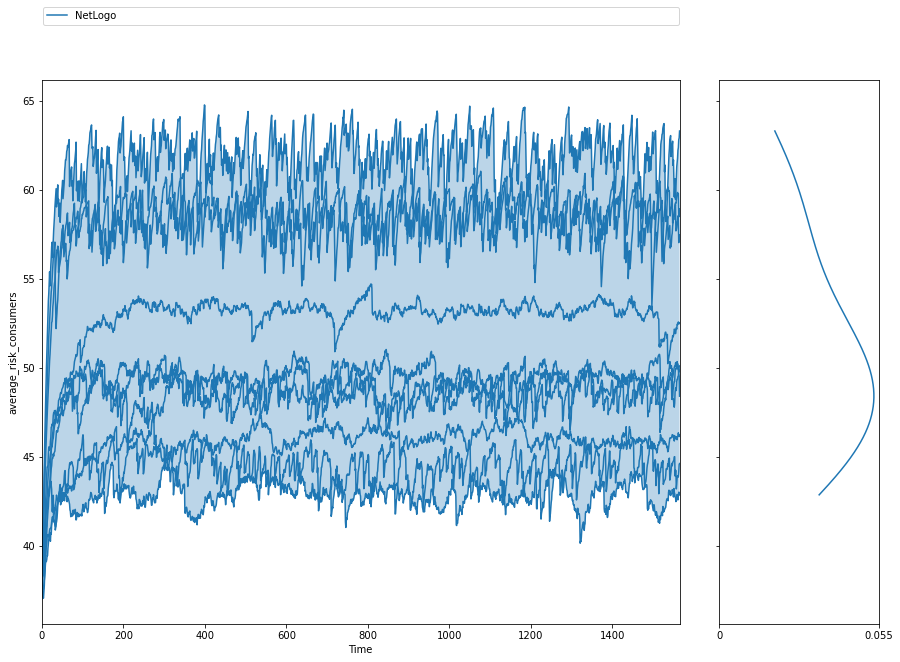

In [10]:
experiments_to_show = np.arange(0, experiments.shape[0], 1)

fig,ax=plotting.lines(experiments, outcomes_test, outcomes_to_show='average_risk_consumers', 
       group_by='model', show_envelope=True, density=plotting.Density.KDE, 
       titles=None, experiments_to_show=experiments_to_show)

fig.set_figheight(10)
fig.set_figwidth(15)
plt.show()